In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import json
import numpy as np
import requests



In [2]:
ontimeMarketing = ("T_ONTIME_MARKETING.csv")

airlineData = pd.read_csv(ontimeMarketing, encoding="utf-8", low_memory=False)  # Add "low_memory" parameter to improve memory usage during parsing
cleanAirlineData = airlineData[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME",
                                "DEST_STATE_ABR", "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY", "TAXI_OUT", "TAXI_IN", "ARR_TIME",
                                "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "CARRIER_DELAY", "WEATHER_DELAY",
                                "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "DIV_AIRPORT_LANDINGS", "DIV_ACTUAL_ELAPSED_TIME"]]
cleanAirlineData

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,900,852.0,-8.0,18.0,5.0,1124.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232.0,-3.0,17.0,12.0,2107.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754.0,-6.0,18.0,8.0,2041.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,"Los Angeles, CA",CA,"Boston, MA",MA,750,742.0,-8.0,20.0,15.0,1638.0,...,0.0,NaN,0.0,0.0,0.0,19.0,0.0,0.0,0,NaN
4,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458.0,-4.0,22.0,5.0,1654.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203.0,3.0,12.0,5.0,1218.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
582421,"Seattle, WA",WA,"Denver, CO",CO,1800,1842.0,42.0,15.0,5.0,2218.0,...,0.0,NaN,0.0,0.0,0.0,6.0,0.0,42.0,0,NaN
582422,"Orlando, FL",FL,"Austin, TX",TX,705,703.0,-2.0,18.0,4.0,907.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
582423,"Los Angeles, CA",CA,"Sacramento, CA",CA,1315,1430.0,75.0,15.0,3.0,1549.0,...,0.0,NaN,0.0,69.0,0.0,0.0,0.0,0.0,0,NaN


In [3]:
dallasAirlines = cleanAirlineData.loc[(cleanAirlineData["ORIGIN_CITY_NAME"] == "Dallas, TX") |
                                  (cleanAirlineData["DEST_CITY_NAME"] == "Dallas, TX")].fillna(0.0)
DAL = dallasAirlines
DAL

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
4831,"Seattle, WA",WA,"Dallas, TX",TX,731,730.0,-1.0,17.0,5.0,1319.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4832,"Dallas, TX",TX,"Seattle, WA",WA,1428,1436.0,8.0,12.0,7.0,1638.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5222,"San Francisco, CA",CA,"Dallas, TX",TX,1335,1324.0,-11.0,23.0,5.0,1854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
5223,"Dallas, TX",TX,"San Francisco, CA",CA,2008,2002.0,-6.0,17.0,4.0,2135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7290,"Dallas, TX",TX,"Atlanta, GA",GA,600,603.0,3.0,70.0,12.0,949.0,...,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582309,"Dallas, TX",TX,"Las Vegas, NV",NV,2015,2021.0,6.0,10.0,2.0,2054.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
582369,"Dallas, TX",TX,"San Diego, CA",CA,1255,1255.0,0.0,14.0,3.0,1355.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
582370,"Chicago, IL",IL,"Dallas, TX",TX,930,927.0,-3.0,15.0,3.0,1130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
582396,"Dallas, TX",TX,"Chicago, IL",IL,705,700.0,-5.0,8.0,4.0,903.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [4]:
DAL_delay = DAL.loc[(DAL["DEP_DELAY"].astype(float) > 0.0) | (DAL["ARR_DELAY"].astype(float) > 0.0)]
DAL_delay = DAL_delay[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "DEP_DELAY",
                        "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY",
                        "LATE_AIRCRAFT_DELAY", "DIV_ACTUAL_ELAPSED_TIME", "CANCELLED", "DIVERTED"]].fillna(0.0)
DAL_delay

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ACTUAL_ELAPSED_TIME,CANCELLED,DIVERTED
4832,"Dallas, TX",TX,"Seattle, WA",WA,8.0,12.0,7.0,-21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7290,"Dallas, TX",TX,"Atlanta, GA",GA,3.0,70.0,12.0,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0
7301,"Los Angeles, CA",CA,"Dallas, TX",TX,19.0,25.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7413,"Dallas, TX",TX,"Los Angeles, CA",CA,93.0,12.0,11.0,71.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8512,"Dallas, TX",TX,"Atlanta, GA",GA,7.0,14.0,9.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582134,"Dallas, TX",TX,"Nashville, TN",TN,-1.0,12.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582149,"Dallas, TX",TX,"New Orleans, LA",LA,11.0,11.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582184,"Kansas City, MO",MO,"Dallas, TX",TX,18.0,13.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582308,"San Antonio, TX",TX,"Dallas, TX",TX,31.0,7.0,4.0,24.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0


In [5]:

count_carrier_delay = len(DAL_delay[DAL_delay['CARRIER_DELAY'] > 0])
count_weather_delay = len(DAL_delay[DAL_delay['WEATHER_DELAY'] > 0])
count_nas_delay = len(DAL_delay[DAL_delay['NAS_DELAY'] > 0])
count_security_delay = len(DAL_delay[DAL_delay['SECURITY_DELAY'] > 0])
count_late_aircraft_delay = len(DAL_delay[DAL_delay['LATE_AIRCRAFT_DELAY'] > 0])

In [6]:
delay_types = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
counts = [count_carrier_delay, count_weather_delay, count_nas_delay, count_security_delay, count_late_aircraft_delay]


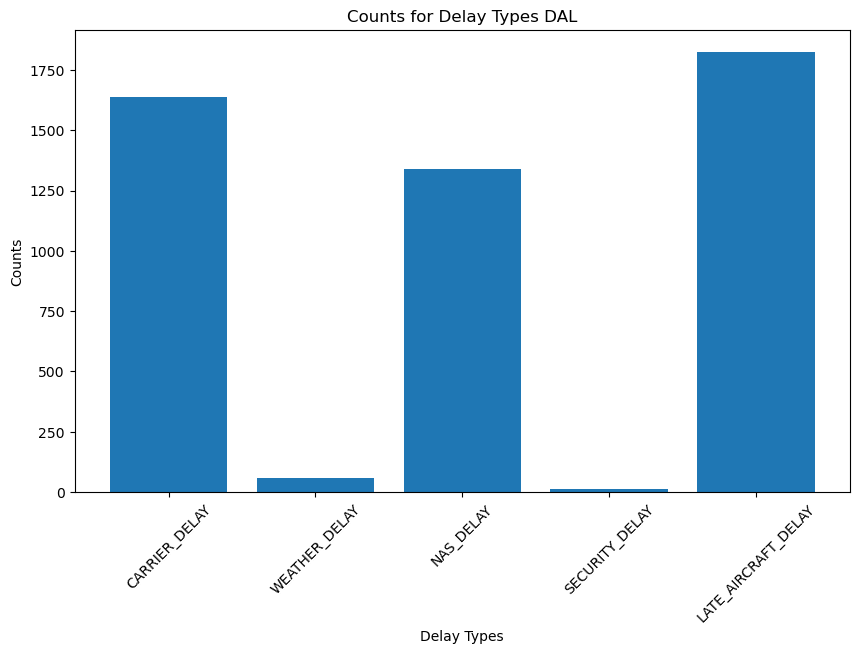

<Figure size 640x480 with 0 Axes>

In [16]:
delay_counts = {
    "CARRIER_DELAY": count_carrier_delay,
    "WEATHER_DELAY": count_weather_delay,
    "NAS_DELAY": count_nas_delay,
    "SECURITY_DELAY": count_security_delay,
    "LATE_AIRCRAFT_DELAY": count_late_aircraft_delay
}

filtered_counts = [count for count in counts if count > 0]
plt.figure(figsize=(10, 6))
plt.bar(delay_types, filtered_counts)
plt.xlabel("Delay Types")
plt.ylabel("Counts")
plt.title("Counts for Delay Types DAL")
plt.xticks(rotation=45)

plt.show()

plt.savefig("Dallas_bar_chart")

<BarContainer object of 5 artists>

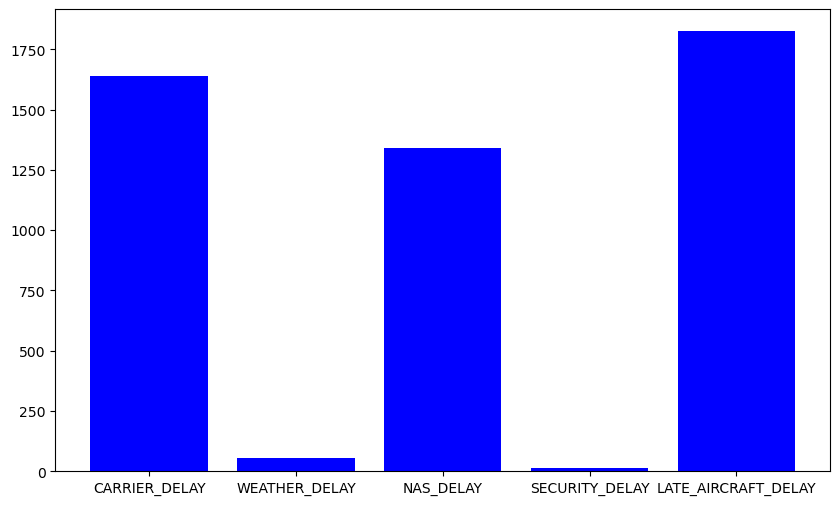

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(delay_types, [delay_counts[type] for type in delay_types], color='blue')


In [18]:
max_arr_delay_dallas = DAL_delay[DAL_delay["DEST_CITY_NAME"] == "Dallas, TX"]["ARR_DELAY"].max()
max_dep_delay_dallas = DAL_delay[DAL_delay["ORIGIN_CITY_NAME"] == "Dallas, TX"]["DEP_DELAY"].max()

DAL_delay["ARR_DELAY"] = pd.to_numeric(DAL_delay["ARR_DELAY"], errors='coerce')
DAL_delay["DEP_DELAY"] = pd.to_numeric(DAL_delay["DEP_DELAY"], errors='coerce')

min_arr_delay_dallas = DAL_delay[(DAL_delay["ORIGIN_CITY_NAME"] == "Dallas, TX") & (DAL_delay["ARR_DELAY"] >=0)]["ARR_DELAY"].min()
min_dep_delay_dallas = DAL_delay[(DAL_delay["ORIGIN_CITY_NAME"] == "Dallas, TX") & (DAL_delay["DEP_DELAY"] >=0)]["DEP_DELAY"].min()

print("Maximum Arrival Delays for Dallas, TX:", max_arr_delay_dallas)
print("Minimum Arrival Delays for Dallas, TX:", max_dep_delay_dallas)
print("Minimum Flight Arrival Delay for Dallas, TX (excluding negative values): ", min_arr_delay_dallas)
print("Minimum Flight Departure Delay for Dallas, TX (excluding negative values): ", min_dep_delay_dallas)

filtered_flights = DAL_delay[((DAL_delay["DEST_CITY_NAME"] == "Dallas, TX") & (DAL_delay["DEP_DELAY"] >=0)) |
                             ((DAL_delay["ORIGIN_CITY_NAME"] == "Dallas, TX") & (DAL_delay["ARR_DELAY"] >=0))]

filtered_flights


Maximum Arrival Delays for Dallas, TX: 459.0
Minimum Arrival Delays for Dallas, TX: 1020.0
Minimum Flight Arrival Delay for Dallas, TX (excluding negative values):  0.0
Minimum Flight Departure Delay for Dallas, TX (excluding negative values):  0.0


,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ACTUAL_ELAPSED_TIME,CANCELLED,DIVERTED
7290,"Dallas, TX",TX,"Atlanta, GA",GA,3.0,70.0,12.0,44.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0
7301,"Los Angeles, CA",CA,"Dallas, TX",TX,19.0,25.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7413,"Dallas, TX",TX,"Los Angeles, CA",CA,93.0,12.0,11.0,71.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14165,"Dallas, TX",TX,"Nashville, TN",TN,-2.0,18.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14181,"Dallas, TX",TX,"Austin, TX",TX,0.0,19.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582116,"El Paso, TX",TX,"Dallas, TX",TX,3.0,8.0,3.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582134,"Dallas, TX",TX,"Nashville, TN",TN,-1.0,12.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582149,"Dallas, TX",TX,"New Orleans, LA",LA,11.0,11.0,6.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582184,"Kansas City, MO",MO,"Dallas, TX",TX,18.0,13.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


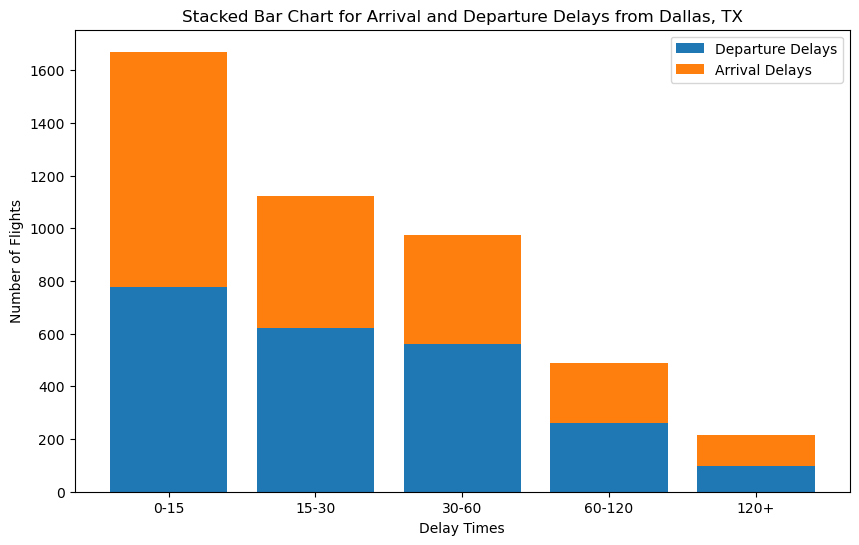

For departure delays, in 0-15 mins, there are 777 delays
For arrival delays, in 0-15 mins, there are 893 delays
For departure delays, in 15-30 mins, there are 621 delays
For arrival delays, in 15-30 mins, there are 503 delays
For departure delays, in 30-60 mins, there are 560 delays
For arrival delays, in 30-60 mins, there are 416 delays
For departure delays, in 60-120 mins, there are 260 delays
For arrival delays, in 60-120 mins, there are 230 delays
For departure delays, in 120+ mins, there are 97 delays
For arrival delays, in 120+ mins, there are 119 delays


C:\Users\obsid\AppData\Local\Temp\ipykernel_19384\3794920664.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For departure delays, in {label} mins, there are {dep_delay_count[i]} delays")
C:\Users\obsid\AppData\Local\Temp\ipykernel_19384\3794920664.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For arrival delays, in {label} mins, there are {arr_delay_count[i]} delays")


<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 15, 30, 60, 120, float('inf')]
labels = ['0-15', '15-30', '30-60', '60-120', '120+']

arr_delay_dallas = filtered_flights[filtered_flights["DEST_CITY_NAME"] == "Dallas, TX"].copy()
arr_delay_dallas.loc[:, 'ARR_DELAY_BIN'] = pd.cut(arr_delay_dallas['ARR_DELAY'], bins=bins, labels=labels, right=False)

dep_delay_dallas = filtered_flights[filtered_flights["ORIGIN_CITY_NAME"] == "Dallas, TX"].copy()
dep_delay_dallas.loc[:, 'DEP_DELAY_BIN'] = pd.cut(dep_delay_dallas['DEP_DELAY'], bins=bins, labels=labels, right=False)

arr_delay_count = arr_delay_dallas['ARR_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)
dep_delay_count = dep_delay_dallas['DEP_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(labels, dep_delay_count, label='Departure Delays')
plt.bar(labels, arr_delay_count, bottom=dep_delay_count, label='Arrival Delays')

plt.xlabel('Delay Times')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Chart for Arrival and Departure Delays from Dallas, TX')
plt.legend()

plt.show()

for i, label in enumerate(labels):
    print(f"For departure delays, in {label} mins, there are {dep_delay_count[i]} delays")
    print(f"For arrival delays, in {label} mins, there are {arr_delay_count[i]} delays")

plt.savefig("Dallas_stacked_bar")

In [43]:
dep_delay_dallas = DAL[(DAL["ORIGIN_CITY_NAME"] == "Dallas, TX") & (dallasAirlines["DEP_DELAY"].astype(float) > 0)]
arr_delay_dallas = dallasAirlines[(dallasAirlines["DEST_CITY_NAME"] == "Dallas, TX") & (dallasAirlines["ARR_DELAY"].astype(float) > 0)]

dallasAirlines.loc[:, "CANCELLED"] = pd.to_numeric(dallasAirlines["CANCELLED"], errors='coerce')
dallasAirlines.loc[:, "DIVERTED"] = pd.to_numeric(dallasAirlines["DIVERTED"], errors='coerce')

cancelled_flights = dallasAirlines[dallasAirlines["CANCELLED"] > 0.0]
diverted_flights = dallasAirlines[dallasAirlines["DIVERTED"] > 0.0]

num_dep_delay_dallas = len(dep_delay_dallas)
num_arr_delay_dallas = len(arr_delay_dallas)
print("Number of Flights with Departure delays for Dallas:", num_dep_delay_dallas)
print("Number of Flights with Arrival delays for Dallas:", num_arr_delay_dallas)

num_cancelled = len(cancelled_flights)
num_diverted = len(diverted_flights)
print("Number of Cancelled Flights:", num_cancelled)
print("Number of Diverted Flights:", num_diverted)

num_no_delays = len(dallasAirlines) - num_dep_delay_dallas - num_arr_delay_dallas - num_cancelled - num_diverted 
print("Number of On-Time or Early Flights:", num_no_delays)

Number of Flights with Departure delays for Dallas: 3095
Number of Flights with Arrival delays for Dallas: 2891
Number of Cancelled Flights: 447
Number of Diverted Flights: 23
Number of On-Time or Early Flights: 5618


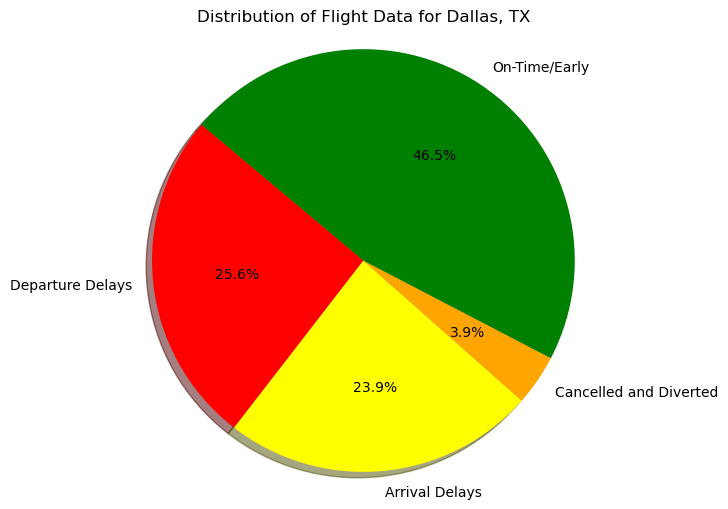

In [44]:
labels = ['Departure Delays', 'Arrival Delays', 'Cancelled and Diverted', 'On-Time/Early']
sizes = [num_dep_delay_dallas, num_arr_delay_dallas, num_cancelled + num_diverted, num_no_delays]
colors = ['red', 'yellow', 'orange', 'green']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Distribution of Flight Data for Dallas, TX')
plt.show()

plt.savefig("Dallas_pie_charts")

In [46]:
from config import api_key

target_city = "Dallas, TX"

params = {
    "text": target_city,
    "apiKey": api_key
}

base_url = "https://api.geoapify.com/v1/geocode/search"

response = requests.get(base_url, params=params).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "error": "Unauthorized",
    "message": "Not allowed",
    "statusCode": 401
}


In [ ]:
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

print(f"{target_city}: {lat}, {lon}")

In [ ]:
target_city = "Dallas Fort Worth International Airport"

params = {
    "text": target_city,
    "apiKey": api_key
}

base_url = "https://api.geoapify.com/v1/geocode/search="

response = requests.get(base_url, params=params).json()

print(json.dumps(response, indent=4, sort_kets=True))
